<a href="https://colab.research.google.com/github/Zachary-Fernandes/CSCI-6962/blob/main/fernazHW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3
#####Zachary Fernandes
#####Projects in Machine Learning and AI

### The Problem

The problem I wanted to understand entails determining whether or not a particular individual will experience a complication during or following surgery given a number of patient and surgery factors. This [dataset](https://www.kaggle.com/datasets/omnamahshivai/surgical-dataset-binary-classification?select=Surgical-deepnet.csv) is arguably more complex than the previous homeworks in the sense it has 25 features including the target (complication). That being said, it comes with less observations at around 14000. Its complexity means both the neural network and logistic regression models can be used to attempt to solve this problem. Accuracy will be the main measure here as it is critical to know exactly who will and who will not have a complication.

### Learning TensorFlow

I chose TensorFlow as my machine learning model. Here are the resources I used to learn TensorFlow:

https://towardsdatascience.com/beginners-guide-to-deep-learning-with-tensorflow-ca85969b2f2 - this article is an example I can follow along with when writing my neural network and understanding how the data should be fed into TensorFlow's neural networks. Several sections of my code were inspired by this, including the model's original setup and considering how to input the data to the model. Its implementation helps with understanding the computations and which functions implement forward propagation, backward propagation, setting up the model, and training.

https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization - this documentation helps me understand batch normalization as a layer.

https://keras.io/api/optimizers/ - this document informed me about what optimizers are available to use in TensorFlow through Keras.

https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy - this helped me learn how to plot the different loss and accuracy curves through TensorFlow's history.

https://towardsdatascience.com/the-art-of-hyperparameter-tuning-in-deep-neural-nets-by-example-685cb5429a38 - this article helped me understand how to tune hyperparameters. My learning rate adjustments were based on the code in here.

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay - this helped me learn about exponential decay and how it can apply to the learning rate as inspired by the above article.

https://deeplizard.com/learn/video/2f-NjDUvZIE - this helped me understand how to predict in TensorFlow.

https://towardsdatascience.com/regularization-techniques-and-their-implementation-in-tensorflow-keras-c06e7551e709 - this taught me about the regularization techniques available in TensorFlow. I use L2 regularization in my code.

https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/Regularizer - this helped me learn about regularizers.

https://www.tensorflow.org/api_docs/python/tf/keras/Model - this helped me learn about the different properties models have.

https://www.tensorflow.org/tutorials/keras/classification - this classification page helps me with this problem as the problem I wish to solve entails binary classification.

https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting - this helps me understand how overfitting shows up in the model.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html - this resource is important as TensorFlow needs NumPy arrays for data input.

https://towardsdatascience.com/batch-normalization-in-practice-an-example-with-keras-and-tensorflow-2-0-b1ec28bde96f - this shows batch normalization in practice should I wish to use it.

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense - this helps me understand how layers are set up in TensorFlow and Keras.

In [1]:
!pip install imbalanced-learn
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow import feature_column
from tensorflow import keras
import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, BatchNormalization

from IPython.display import clear_output

from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

### Exploratory Data Analysis
Below are the steps I take to perform Exploratory Data Analysis.

#### Getting the Data

In [3]:
# data source: https://www.kaggle.com/datasets/omnamahshivai/surgical-dataset-binary-classification?select=Surgical-deepnet.csv
# note: we have combined Training and Testing data from Kaggle into a single data frame
df = pd.read_csv('Surgical-deepnet.csv')

Data Dictionary

https://www.causeweb.org/tshs/datasets/Surgery%20Timing%20Data%20Dictionary.pdf

### Exploring the Data

In [4]:
# viewing the first few rows of the data
df.head()

bmi   Age  asa_status  baseline_cancer  baseline_charlson  baseline_cvd  \
0  19.31  59.2           1                1                  0             0   
1  18.73  59.1           0                0                  0             0   
2  21.85  59.0           0                0                  0             0   
3  18.49  59.0           1                0                  1             0   
4  19.70  59.0           1                0                  0             0   

   baseline_dementia  baseline_diabetes  baseline_digestive  \
0                  0                  0                   0   
1                  0                  0                   0   
2                  0                  0                   0   
3                  0                  1                   1   
4                  0                  0                   0   

   baseline_osteoart  ...  complication_rsi  dow  gender   hour  month  \
0                  0  ...             -0.57    3       0   7.63      6   
1                  0  ...              0.21    0       0  12.93      0   
2                  0  ...              0.00    2       0   7.68      5   
3                  0  ...             -0.65    2       1   7.58      4   
4                  0  ...              0.00    0       0   7.88     11   

   moonphase  mort30  mortality_rsi  race  complication  
0          1       0          -0.43     1             0  
1          1       0          -0.41     1             0  
2          3       0           0.08     1             0  
3          3       0          -0.32     1             0  
4          0       0           0.00     1             0  

[5 rows x 25 columns]

In [5]:
# what's the data size?
df.shape
# there are not many features, but there are plenty of examples

(14635, 25)

In [6]:
# are there any missing values?
df.isna().sum()
# there are no missing values

bmi                    0
Age                    0
asa_status             0
baseline_cancer        0
baseline_charlson      0
baseline_cvd           0
baseline_dementia      0
baseline_diabetes      0
baseline_digestive     0
baseline_osteoart      0
baseline_psych         0
baseline_pulmonary     0
ahrq_ccs               0
ccsComplicationRate    0
ccsMort30Rate          0
complication_rsi       0
dow                    0
gender                 0
hour                   0
month                  0
moonphase              0
mort30                 0
mortality_rsi          0
race                   0
complication           0
dtype: int64

In [7]:
# general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14635 entries, 0 to 14634
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bmi                  14635 non-null  float64
 1   Age                  14635 non-null  float64
 2   asa_status           14635 non-null  int64  
 3   baseline_cancer      14635 non-null  int64  
 4   baseline_charlson    14635 non-null  int64  
 5   baseline_cvd         14635 non-null  int64  
 6   baseline_dementia    14635 non-null  int64  
 7   baseline_diabetes    14635 non-null  int64  
 8   baseline_digestive   14635 non-null  int64  
 9   baseline_osteoart    14635 non-null  int64  
 10  baseline_psych       14635 non-null  int64  
 11  baseline_pulmonary   14635 non-null  int64  
 12  ahrq_ccs             14635 non-null  int64  
 13  ccsComplicationRate  14635 non-null  float64
 14  ccsMort30Rate        14635 non-null  float64
 15  complication_rsi     14635 non-null 

In [8]:
df.dtypes

bmi                    float64
Age                    float64
asa_status               int64
baseline_cancer          int64
baseline_charlson        int64
baseline_cvd             int64
baseline_dementia        int64
baseline_diabetes        int64
baseline_digestive       int64
baseline_osteoart        int64
baseline_psych           int64
baseline_pulmonary       int64
ahrq_ccs                 int64
ccsComplicationRate    float64
ccsMort30Rate          float64
complication_rsi       float64
dow                      int64
gender                   int64
hour                   float64
month                    int64
moonphase                int64
mort30                   int64
mortality_rsi          float64
race                     int64
complication             int64
dtype: object

In [9]:
# statistics of the dataset (numeric columns)
df.describe()

bmi           Age    asa_status  baseline_cancer  \
count  14635.000000  14635.000000  14635.000000     14635.000000   
mean      31.295642     63.205268      0.632320         0.262316   
std        8.152709     18.088191      0.539952         0.439909   
min        2.150000      6.100000      0.000000         0.000000   
25%       26.510000     51.500000      0.000000         0.000000   
50%       28.980000     59.700000      1.000000         0.000000   
75%       35.295000     74.700000      1.000000         1.000000   
max       92.590000     90.000000      2.000000         1.000000   

       baseline_charlson  baseline_cvd  baseline_dementia  baseline_diabetes  \
count       14635.000000  14635.000000       14635.000000       14635.000000   
mean            0.977520      0.620294           0.004851           0.120875   
std             1.758355      0.485330           0.069485           0.325993   
min             0.000000      0.000000           0.000000           0.000000   
25%             0.000000      0.000000           0.000000           0.000000   
50%             0.000000      1.000000           0.000000           0.000000   
75%             2.000000      1.000000           0.000000           0.000000   
max            13.000000      1.000000           1.000000           1.000000   

       baseline_digestive  baseline_osteoart  ...  complication_rsi  \
count        14635.000000       14635.000000  ...      14635.000000   
mean             0.189546           0.342740  ...         -0.699044   
std              0.391955           0.474642  ...          1.339394   
min              0.000000           0.000000  ...         -4.720000   
25%              0.000000           0.000000  ...         -1.970000   
50%              0.000000           0.000000  ...         -0.580000   
75%              0.000000           1.000000  ...          0.000000   
max              1.000000           1.000000  ...         12.560000   

                dow        gender          hour         month     moonphase  \
count  14635.000000  14635.000000  14635.000000  14635.000000  14635.000000   
mean       1.606970      0.548890     10.171613      5.915408      1.187086   
std        1.497738      0.497621      2.659881      3.239825      1.158357   
min        0.000000      0.000000      6.070000      0.000000      0.000000   
25%        0.000000      0.000000      7.820000      3.000000      0.000000   
50%        1.000000      1.000000      9.120000      7.000000      1.000000   
75%        3.000000      1.000000     12.050000      8.000000      2.000000   
max        4.000000      1.000000     18.920000     11.000000      3.000000   

             mort30  mortality_rsi          race  complication  
count  14635.000000   14635.000000  14635.000000  14635.000000  
mean       0.003963      -0.836712      0.919440      0.252135  
std        0.062830       1.194111      0.364663      0.434253  
min        0.000000      -3.820000      0.000000      0.000000  
25%        0.000000      -2.250000      1.000000      0.000000  
50%        0.000000      -0.640000      1.000000      0.000000  
75%        0.000000       0.000000      1.000000      1.000000  
max        1.000000       4.400000      2.000000      1.000000  

[8 rows x 25 columns]

In [10]:
# statistics of the dataset (categorical columns - name and orbiting-body)
df.describe(include=['float64'])

bmi           Age  ccsComplicationRate  ccsMort30Rate  \
count  14635.000000  14635.000000         14635.000000   14635.000000   
mean      31.295642     63.205268             0.133570       0.004447   
std        8.152709     18.088191             0.088402       0.004579   
min        2.150000      6.100000             0.016118       0.000000   
25%       26.510000     51.500000             0.081977       0.001962   
50%       28.980000     59.700000             0.105720       0.002959   
75%       35.295000     74.700000             0.183370       0.007398   
max       92.590000     90.000000             0.466129       0.016673   

       complication_rsi          hour  mortality_rsi  
count      14635.000000  14635.000000   14635.000000  
mean          -0.699044     10.171613      -0.836712  
std            1.339394      2.659881       1.194111  
min           -4.720000      6.070000      -3.820000  
25%           -1.970000      7.820000      -2.250000  
50%           -0.580000      9.120000      -0.640000  
75%            0.000000     12.050000       0.000000  
max           12.560000     18.920000       4.400000

In [11]:
# is the data imbalanced?
df.complication.value_counts(normalize=True) #normalizes the result
# at about 75% false and 25% true, this dataset is imbalanced

0    0.747865
1    0.252135
Name: complication, dtype: float64

#### Pairplot

''

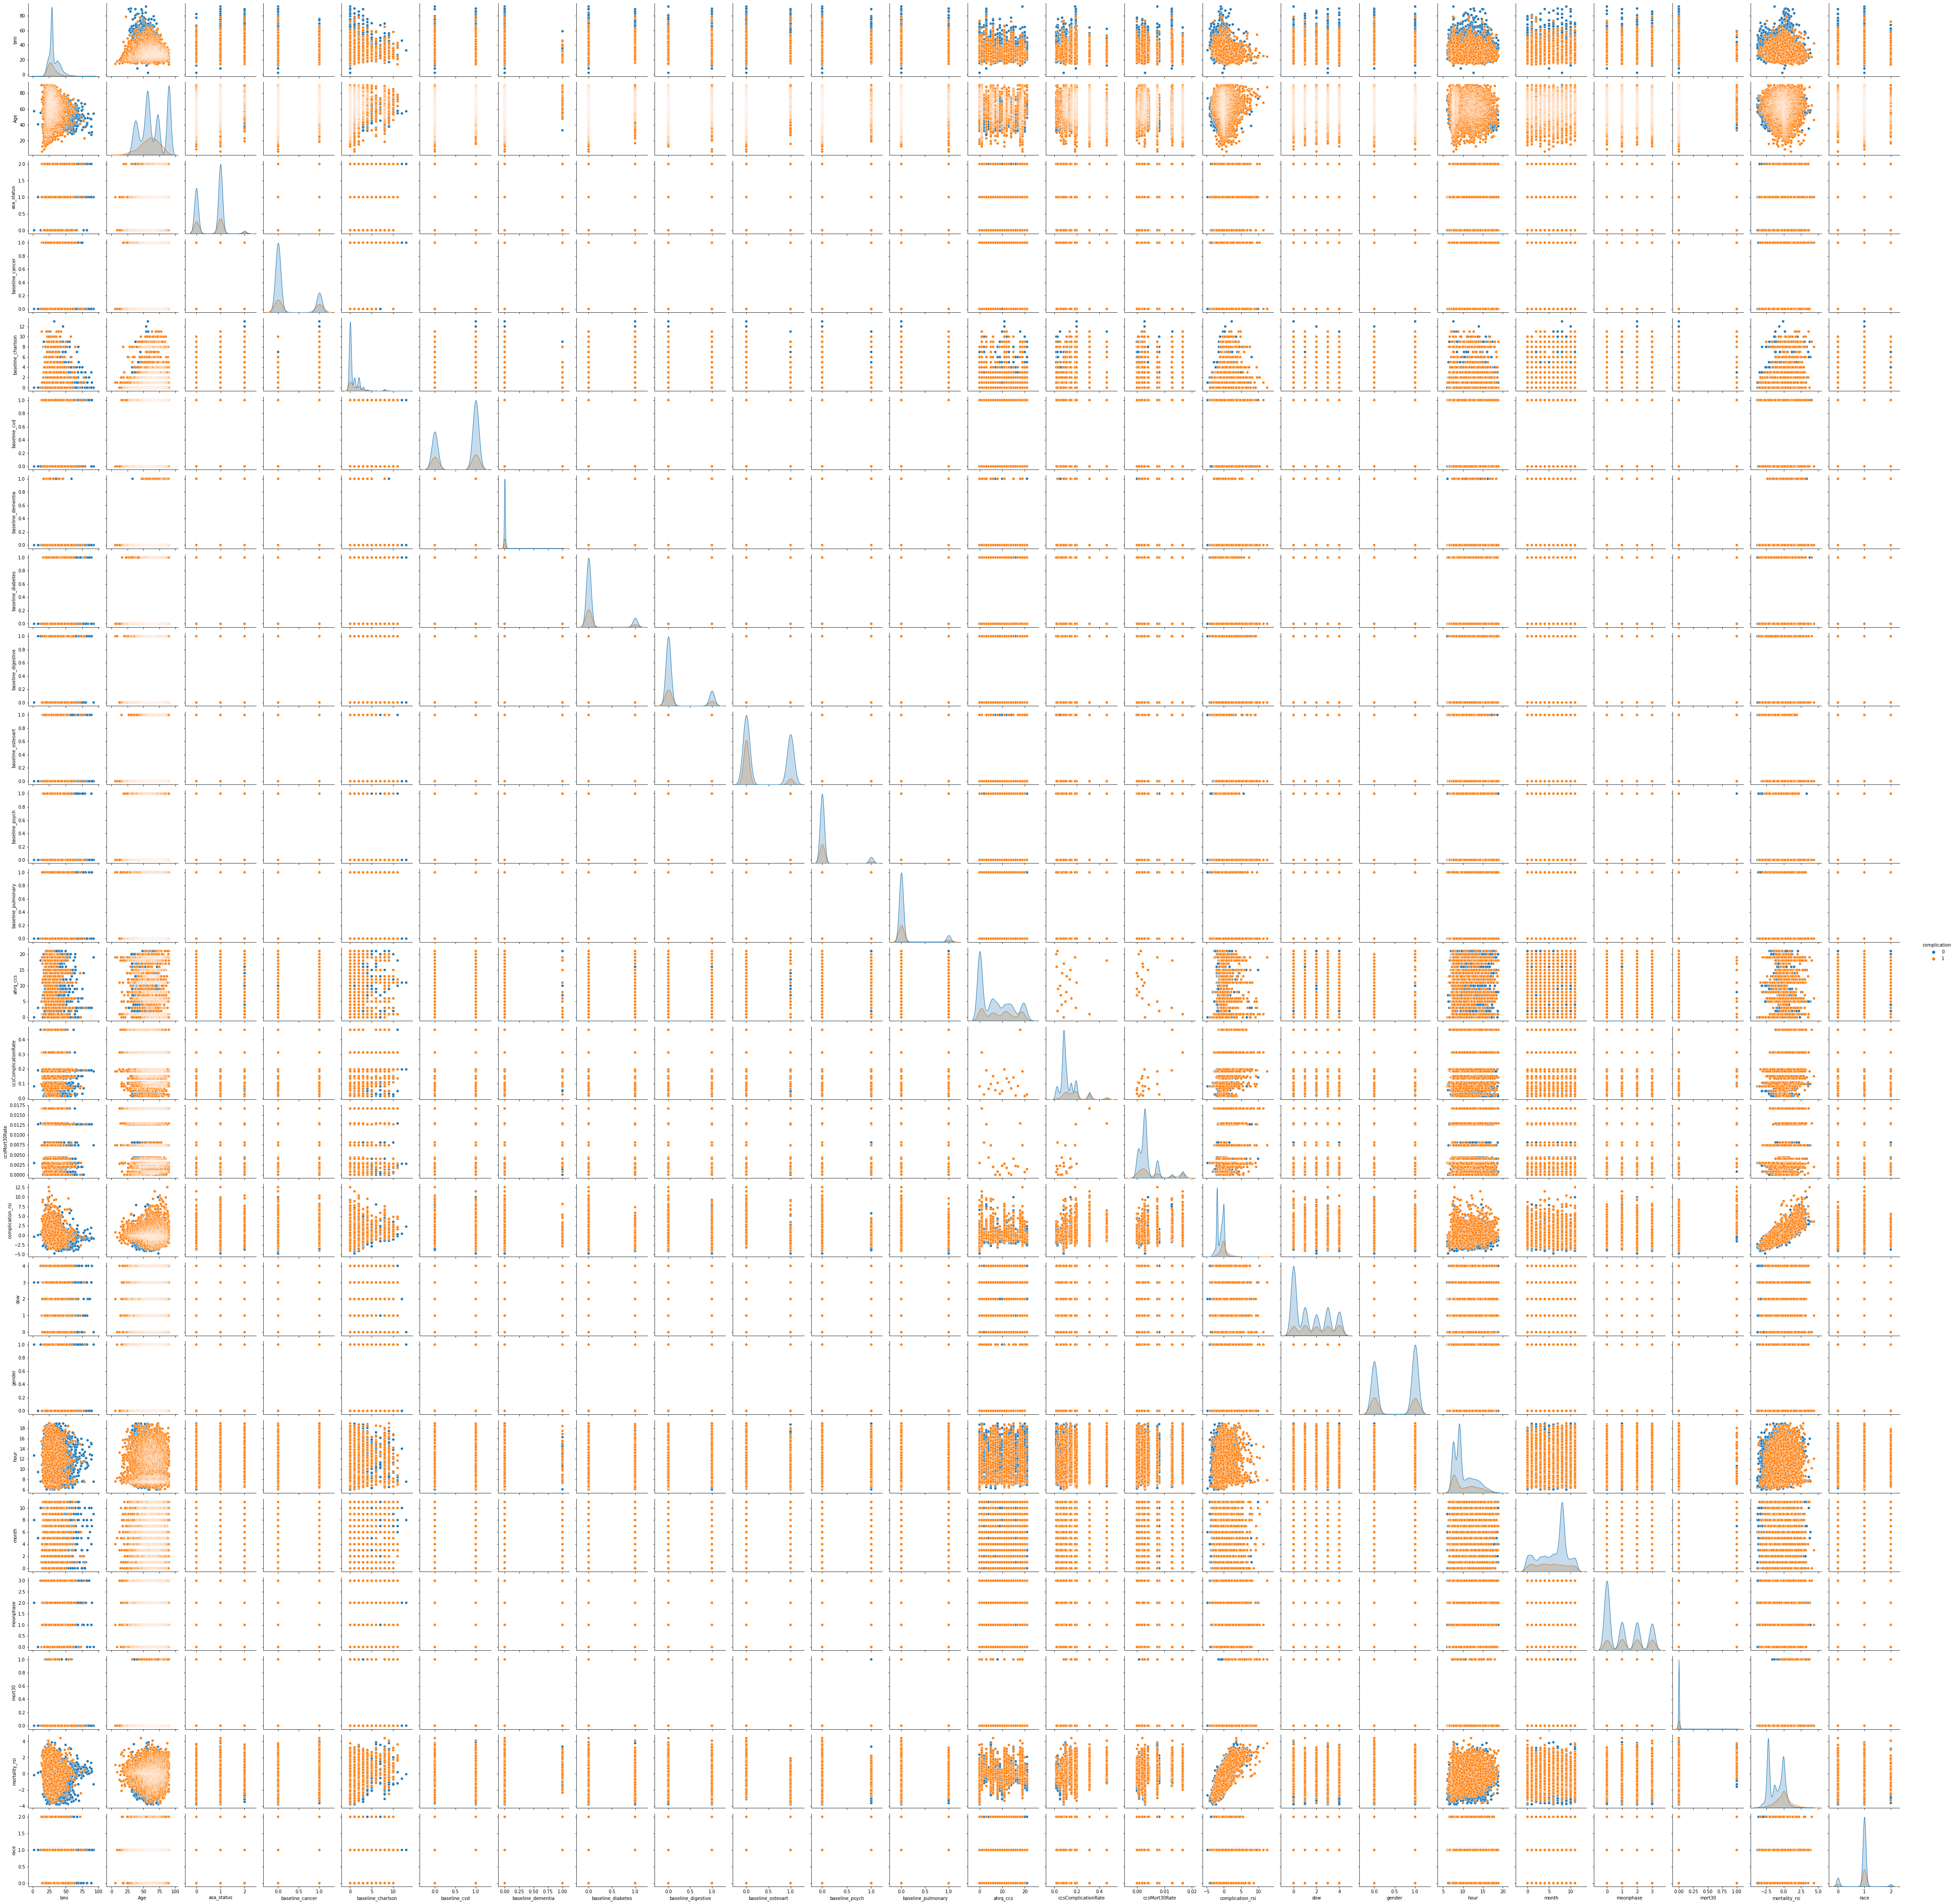

In [ ]:
# ploting pairwise relationships in the dataset
sns.pairplot(df, hue='complication')
,

#### Scatter Plot

''

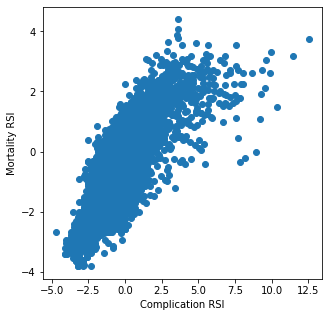

In [12]:
# useful for identifying relationship (i.e. correlation) between two parameters
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df.complication_rsi, df.mortality_rsi)
ax.set_xlabel('Complication RSI')
ax.set_ylabel('Mortality RSI')
,

''

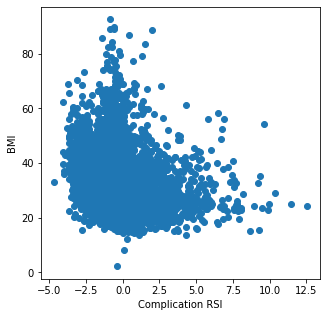

In [13]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df.complication_rsi, df.bmi)
ax.set_xlabel('Complication RSI')
ax.set_ylabel('BMI')
,

''

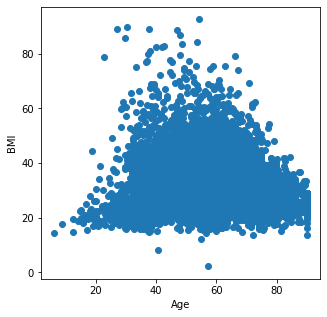

In [14]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(df.Age, df.bmi)
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
,

#### Pie Chart

''

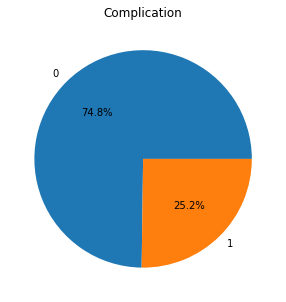

In [15]:
# useful for depicting proportional data with each slice of pie representing a
# specific category
fig, ax = plt.subplots(figsize=(5,5))
ax.pie(x=df.complication.value_counts(), 
       labels=df.complication.value_counts().index,
       autopct='%1.1f%%')
ax.set_title('Complication')
,

#### Histogram

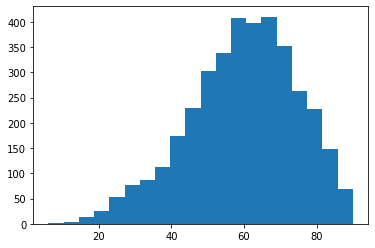

In [16]:
# useful for visualizing the distribution of the data
test = df[df['complication'] == True]
test.shape
testCol = test['Age'].values
testCol
testHist = np.asarray(testCol, dtype='float')
plt.hist(testHist, bins = 20)
plt.show()

### Adjustments from Exploratory Data Analysis.

During Exploratory Data Analysis, I noticed some of the features are not relevant for the purposes of this project. That being said, we can remove some of them.

Now we observe how our features correlate with each other and with the target variable, complication:

''

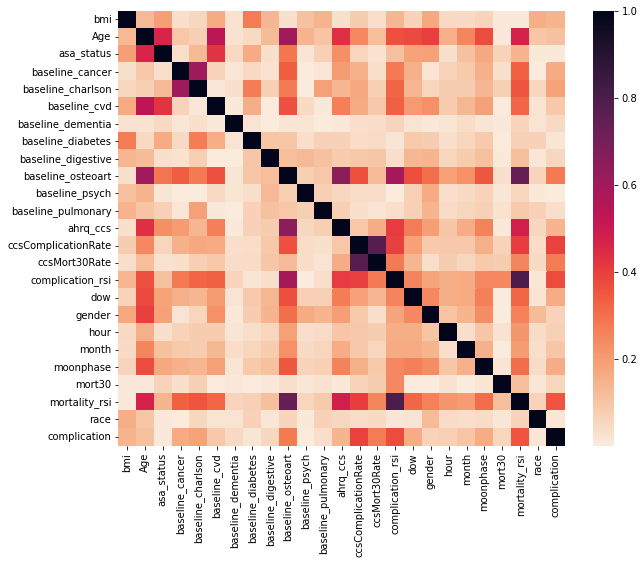

In [17]:
fig, ax = plt.subplots(figsize=(10,8))
df3 = df
sns.heatmap(df3.corr().abs(),annot=False, ax=ax, cmap='rocket_r')
,

In [18]:
# feature correlation with target variable
df3.corr()['complication'].sort_values(ascending=False)

complication           1.000000
ccsComplicationRate    0.390923
complication_rsi       0.373834
mortality_rsi          0.356086
ccsMort30Rate          0.276823
baseline_charlson      0.185514
baseline_cancer        0.165639
dow                    0.162355
moonphase              0.161883
ahrq_ccs               0.141858
hour                   0.071588
mort30                 0.056041
baseline_digestive     0.051219
baseline_dementia      0.047781
baseline_pulmonary     0.032236
baseline_diabetes      0.015916
race                   0.012198
baseline_psych        -0.003476
asa_status            -0.005030
gender                -0.064637
baseline_cvd          -0.090748
month                 -0.098057
Age                   -0.111327
bmi                   -0.142174
baseline_osteoart     -0.279056
Name: complication, dtype: float64

#### Oversampling to Counter Bias

We recognize how imbalanced the data is, approximately 75% non-hazardous and 25% hazardous. We must resolve this with oversampling. For our purposes, we will use SMOTE ([Synthetic Minority Over-sampling Technique](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)) to oversample.

In [19]:
# independent variables
X = df3.drop(['complication'], axis=1)

# dependent/target variable
y = df3.complication

X_resampled, y_resampled = SMOTE().fit_resample(X, y)

X

bmi   Age  asa_status  baseline_cancer  baseline_charlson  \
0      19.31  59.2           1                1                  0   
1      18.73  59.1           0                0                  0   
2      21.85  59.0           0                0                  0   
3      18.49  59.0           1                0                  1   
4      19.70  59.0           1                0                  0   
...      ...   ...         ...              ...                ...   
14630  18.79  14.1           1                0                  1   
14631  19.65  12.6           0                0                  0   
14632  14.84  12.6           1                0                  0   
14633  17.75   8.9           0                0                  1   
14634  14.40   6.1           1                0                  1   

       baseline_cvd  baseline_dementia  baseline_diabetes  baseline_digestive  \
0                 0                  0                  0                   0   
1                 0                  0                  0                   0   
2                 0                  0                  0                   0   
3                 0                  0                  1                   1   
4                 0                  0                  0                   0   
...             ...                ...                ...                 ...   
14630             0                  0                  0                   0   
14631             0                  0                  0                   0   
14632             0                  0                  0                   0   
14633             0                  0                  0                   1   
14634             0                  0                  0                   1   

       baseline_osteoart  ...  ccsMort30Rate  complication_rsi  dow  gender  \
0                      0  ...       0.007424             -0.57    3       0   
1                      0  ...       0.016673              0.21    0       0   
2                      0  ...       0.001962              0.00    2       0   
3                      0  ...       0.000000             -0.65    2       1   
4                      0  ...       0.002764              0.00    0       0   
...                  ...  ...            ...               ...  ...     ...   
14630                  0  ...       0.012903             -0.54    1       0   
14631                  0  ...       0.016673             -1.42    4       0   
14632                  0  ...       0.002764              0.65    0       0   
14633                  0  ...       0.007424             -0.50    0       1   
14634                  0  ...       0.007424              0.78    2       0   

        hour  month  moonphase  mort30  mortality_rsi  race  
0       7.63      6          1       0          -0.43     1  
1      12.93      0          1       0          -0.41     1  
2       7.68      5          3       0           0.08     1  
3       7.58      4          3       0          -0.32     1  
4       7.88     11          0       0           0.00     1  
...      ...    ...        ...     ...            ...   ...  
14630   7.78      0          1       0          -0.16     1  
14631   8.40      6          1       0          -0.77     1  
14632  13.25      3          3       0           0.99     1  
14633   8.30      5          0       0           0.17     1  
14634   7.65      4          1       0           1.06     0  

[14635 rows x 24 columns]

In [20]:
y

0        0
1        0
2        0
3        0
4        0
        ..
14630    1
14631    1
14632    1
14633    1
14634    1
Name: complication, Length: 14635, dtype: int64

In [21]:
y.value_counts()

0    10945
1     3690
Name: complication, dtype: int64

In [22]:
X_resampled

bmi        Age  asa_status  baseline_cancer  baseline_charlson  \
0      19.310000  59.200000           1                1                  0   
1      18.730000  59.100000           0                0                  0   
2      21.850000  59.000000           0                0                  0   
3      18.490000  59.000000           1                0                  1   
4      19.700000  59.000000           1                0                  0   
...          ...        ...         ...              ...                ...   
21885  38.402461  65.299799           0                0                  0   
21886  24.133476  64.500000           1                0                  1   
21887  38.168767  80.436658           0                0                  1   
21888  24.426036  49.731552           1                0                  1   
21889  40.357242  62.249945           0                0                  0   

       baseline_cvd  baseline_dementia  baseline_diabetes  baseline_digestive  \
0                 0                  0                  0                   0   
1                 0                  0                  0                   0   
2                 0                  0                  0                   0   
3                 0                  0                  1                   1   
4                 0                  0                  0                   0   
...             ...                ...                ...                 ...   
21885             1                  0                  0                   0   
21886             1                  0                  0                   0   
21887             0                  0                  0                   1   
21888             0                  0                  0                   0   
21889             0                  0                  0                   0   

       baseline_osteoart  ...  ccsMort30Rate  complication_rsi  dow  gender  \
0                      0  ...       0.007424         -0.570000    3       0   
1                      0  ...       0.016673          0.210000    0       0   
2                      0  ...       0.001962          0.000000    2       0   
3                      0  ...       0.000000         -0.650000    2       1   
4                      0  ...       0.002764          0.000000    0       0   
...                  ...  ...            ...               ...  ...     ...   
21885                  0  ...       0.012111         -1.679940    0       0   
21886                  0  ...       0.002708         -0.816188    0       0   
21887                  0  ...       0.000789         -0.399201    2       0   
21888                  0  ...       0.005853          2.053260    3       0   
21889                  0  ...       0.007938         -0.481876    4       0   

            hour  month  moonphase  mort30  mortality_rsi  race  
0       7.630000      6          1       0      -0.430000     1  
1      12.930000      0          1       0      -0.410000     1  
2       7.680000      5          3       0       0.080000     1  
3       7.580000      4          3       0      -0.320000     1  
4       7.880000     11          0       0       0.000000     1  
...          ...    ...        ...     ...            ...   ...  
21885   7.340624      0          1       0      -1.036190     0  
21886  14.485250      4          3       0       0.202707     0  
21887   7.584303      1          2       0      -0.205337     1  
21888   7.974303      5          2       0       0.213898     1  
21889   8.379062      5          2       0      -0.850610     0  

[21890 rows x 24 columns]

In [23]:
y_resampled

0        0
1        0
2        0
3        0
4        0
        ..
21885    1
21886    1
21887    1
21888    1
21889    1
Name: complication, Length: 21890, dtype: int64

In [24]:
# SMOTE oversampled to equalize the True and False examples
y_resampled = y_resampled.rename('target')
y_resampled.value_counts()

0    10945
1    10945
Name: target, dtype: int64

### Neural Network

#### Preparation

First, we perform a train-dev-test split.

In [25]:
# divide data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print("Train data size:     ", len(X_train), '- Percent:', len(X_train)/len(X_resampled))
print("Test data size:       ", len(X_test), '- Percent:', len(X_test)/len(X_resampled))
print("Validation data size: ", len(X_val), '- Percent:', len(X_val)/len(X_resampled))

Train data size:      17730 - Percent: 0.8099588853357698
Test data size:        2189 - Percent: 0.1
Validation data size:  1971 - Percent: 0.09004111466423025


In [26]:
y_train

18297    1
4168     0
8601     0
5027     0
18798    1
        ..
9952     0
3735     0
20667    1
8805     0
15810    1
Name: target, Length: 17730, dtype: int64

In [27]:
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
X_val_np = X_val.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()
y_val_np = y_val.to_numpy()

# Seeing as we split our data into train, test, and validation sets,
# it's time to use the standard scalar

scaler = StandardScaler()
X_train_np = scaler.fit_transform(X_train_np)
X_test_np = scaler.fit_transform(X_test_np)
X_val_np = scaler.fit_transform(X_val_np)

In [28]:
y_train_np

array([1, 0, 0, ..., 1, 0, 1])

In [29]:
y_train_np[17500:17600]

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1])

In [30]:
feature_columns = []

# Creating age buckets
age = feature_column.numeric_column('Age')
age_buckets = feature_column.bucketized_column(age, boundaries=[18, 25, 30, 35, 40, 45, 50, 55, 60, 65])
feature_columns.append(age_buckets)

# Remaining numeric features
numeric = X_train.select_dtypes(include=['int64', 'float64']).drop(['Age'], axis=1).columns.tolist()

for column in numeric:
    column = feature_column.numeric_column(column)
    feature_columns.append(column)

In [31]:
feature_columns

[BucketizedColumn(source_column=NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(18, 25, 30, 35, 40, 45, 50, 55, 60, 65)),
 NumericColumn(key='bmi', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='asa_status', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='baseline_cancer', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='baseline_charlson', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='baseline_cvd', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='baseline_dementia', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='baseline_diabetes', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 NumericColumn(key='baseline_digestive', shape=(1,), default_value=No

In [32]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

#### 2-Layer Neural Network Implementation
This is the network needed for the original homework specifications concerning the network.

For my activation functions, I am using ReLU for my hidden layers and sigmoid for my output layer. This is a two-layer network following the specification from [source](https://towardsdatascience.com/beginners-guide-to-deep-learning-with-tensorflow-ca85969b2f2). Hidden layers have 128 nodes with one output node. The gradient descent optimizer is Adam with the cost function being BinaryCrossentropy. Combined with the sigmoid, this should work well for the binary classification problem laid out earlier as explained in [source](https://medium.com/deep-learning-with-keras/which-activation-loss-functions-part-a-e16f5ad6d82a). Below are the results alongside the hyperparameter tuning for the final product.

In [ ]:
model = tf.keras.Sequential([
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_train = model.fit(X_train_np,
                          y_train_np,
                          validation_data = (X_val_np, y_val_np),
                          epochs=100)

Epoch 1/100
555/555 [==============================] - 2s 3ms/step - loss: 0.4735 - accuracy: 0.7647 - val_loss: 0.4418 - val_accuracy: 0.7965
Epoch 2/100
555/555 [==============================] - 2s 3ms/step - loss: 0.4386 - accuracy: 0.7893 - val_loss: 0.4350 - val_accuracy: 0.7960
Epoch 3/100
555/555 [==============================] - 2s 3ms/step - loss: 0.4300 - accuracy: 0.7942 - val_loss: 0.4249 - val_accuracy: 0.8016
Epoch 4/100
555/555 [==============================] - 2s 3ms/step - loss: 0.4230 - accuracy: 0.7993 - val_loss: 0.4260 - val_accuracy: 0.8011
Epoch 5/100
555/555 [==============================] - 2s 3ms/step - loss: 0.4181 - accuracy: 0.8003 - val_loss: 0.4194 - val_accuracy: 0.8118
Epoch 6/100
555/555 [==============================] - 2s 3ms/step - loss: 0.4139 - accuracy: 0.8036 - val_loss: 0.4176 - val_accuracy: 0.8031
Epoch 7/100
555/555 [==============================] - 2s 3ms/step - loss: 0.4088 - accuracy: 0.8063 - val_loss: 0.4193 - val_accuracy: 0.8042

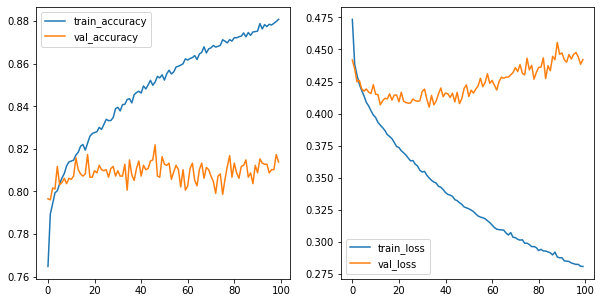

In [98]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(history_train.history['accuracy'])
ax[0].plot(history_train.history['val_accuracy'])
ax[0].legend(['train_accuracy', 'val_accuracy'])
ax[1].plot(history_train.history['loss'])
ax[1].plot(history_train.history['val_loss'])
ax[1].legend(['train_loss', 'val_loss'])
plt.show()

In [93]:
model.evaluate(X_test_np, y_test_np)

69/69 [==============================] - 0s 2ms/step - loss: 0.4416 - accuracy: 0.8122


[0.44158264994621277, 0.8122430443763733]

##### Regularization

In this case, we need regularization as we can see how even a simple two-layer model is overfitting. We can observe this overfitting through validation loss gradually increasing around epoch 40.

In [191]:
modelReg = tf.keras.Sequential([
  layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
  layers.Dense(1, activation = 'sigmoid')
])

modelReg.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_train_Reg = modelReg.fit(X_train_np,
                          y_train_np,
                          validation_data = (X_val_np, y_val_np),
                          epochs=100)

Epoch 1/100
555/555 [==============================] - 2s 3ms/step - loss: 0.5066 - accuracy: 0.7682 - val_loss: 0.4719 - val_accuracy: 0.7935
Epoch 2/100
555/555 [==============================] - 2s 3ms/step - loss: 0.4658 - accuracy: 0.7887 - val_loss: 0.4557 - val_accuracy: 0.8021
Epoch 3/100
555/555 [==============================] - 2s 3ms/step - loss: 0.4543 - accuracy: 0.7923 - val_loss: 0.4465 - val_accuracy: 0.8092
Epoch 4/100
555/555 [==============================] - 2s 3ms/step - loss: 0.4474 - accuracy: 0.7961 - val_loss: 0.4472 - val_accuracy: 0.8047
Epoch 5/100
555/555 [==============================] - 2s 3ms/step - loss: 0.4420 - accuracy: 0.7972 - val_loss: 0.4431 - val_accuracy: 0.7991
Epoch 6/100
555/555 [==============================] - 2s 3ms/step - loss: 0.4382 - accuracy: 0.7998 - val_loss: 0.4400 - val_accuracy: 0.8052
Epoch 7/100
555/555 [==============================] - 2s 3ms/step - loss: 0.4351 - accuracy: 0.8029 - val_loss: 0.4403 - val_accuracy: 0.8092

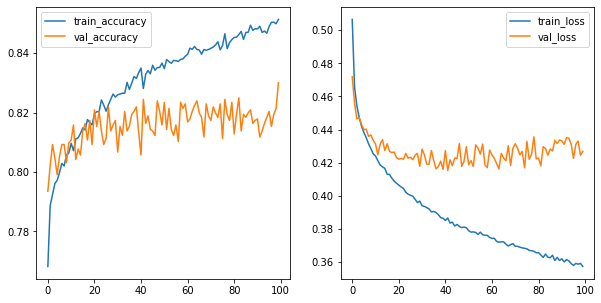

In [195]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(history_train_Reg.history['accuracy'])
ax[0].plot(history_train_Reg.history['val_accuracy'])
ax[0].legend(['train_accuracy', 'val_accuracy'])
ax[1].plot(history_train_Reg.history['loss'])
ax[1].plot(history_train_Reg.history['val_loss'])
ax[1].legend(['train_loss', 'val_loss'])
plt.show()

In [196]:
modelReg.evaluate(X_test_np, y_test_np)

69/69 [==============================] - 0s 2ms/step - loss: 0.4332 - accuracy: 0.8164


[0.4331524670124054, 0.816354513168335]

#### Hyperparameter Tuning

##### Learning Rate

To optimize the learning rate, I used learning rate annealing because as the epochs proceed, the learning rate staying constant will cause divergence later on. In annealing, we start with a larger learning rate as it will decrease over time. I used the exponential decay method from a [Lecture 5 source](https://towardsdatascience.com/the-art-of-hyperparameter-tuning-in-deep-neural-nets-by-example-685cb5429a38) to perform learning rate annealing. Unfortunately, this did not prove fruitful, and thus, I proceeded forward with [Adam's default learning rate](https://towardsdatascience.com/how-to-optimize-learning-rate-with-tensorflow-its-easier-than-you-think-164f980a7c7b) of 0.001.

In [133]:
initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps = 100000,
    decay_rate = 0.96,
    staircase = True)

opt = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

In [134]:
modelLR = tf.keras.Sequential([
  layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
  layers.Dense(1, activation = 'sigmoid')
])

modelLR.compile(optimizer=opt,
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_train_LR = modelLR.fit(X_train_np,
                          y_train_np,
                          validation_data = (X_val_np, y_val_np),
                          epochs=100)

Epoch 1/100
555/555 [==============================] - 2s 3ms/step - loss: 0.5092 - accuracy: 0.7728 - val_loss: 0.4906 - val_accuracy: 0.7834
Epoch 2/100
555/555 [==============================] - 2s 3ms/step - loss: 0.4736 - accuracy: 0.7891 - val_loss: 0.4608 - val_accuracy: 0.7981
Epoch 3/100
555/555 [==============================] - 2s 3ms/step - loss: 0.4604 - accuracy: 0.7918 - val_loss: 0.4503 - val_accuracy: 0.8092
Epoch 4/100
555/555 [==============================] - 2s 3ms/step - loss: 0.4514 - accuracy: 0.7946 - val_loss: 0.4528 - val_accuracy: 0.8031
Epoch 5/100
555/555 [==============================] - 2s 3ms/step - loss: 0.4454 - accuracy: 0.7966 - val_loss: 0.4423 - val_accuracy: 0.8087
Epoch 6/100
555/555 [==============================] - 2s 3ms/step - loss: 0.4409 - accuracy: 0.8033 - val_loss: 0.5169 - val_accuracy: 0.7595
Epoch 7/100
555/555 [==============================] - 2s 3ms/step - loss: 0.4390 - accuracy: 0.8023 - val_loss: 0.4421 - val_accuracy: 0.8077

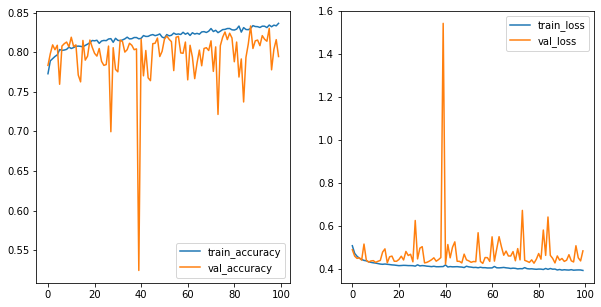

In [135]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(history_train_LR.history['accuracy'])
ax[0].plot(history_train_LR.history['val_accuracy'])
ax[0].legend(['train_accuracy', 'val_accuracy'])
ax[1].plot(history_train_LR.history['loss'])
ax[1].plot(history_train_LR.history['val_loss'])
ax[1].legend(['train_loss', 'val_loss'])
plt.show()

In [138]:
modelLR.evaluate(X_test_np, y_test_np)

69/69 [==============================] - 0s 2ms/step - loss: 0.4967 - accuracy: 0.7825


[0.4967038333415985, 0.7825490832328796]

##### Layer Count

In this section, I tried adding a second and third layer to the neural network.


In [197]:
# Three-layer neural network
modelLC2R = tf.keras.Sequential([
  layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
  layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
  layers.Dense(1, activation = 'sigmoid')
])

modelLC2R.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_train_LC2R = modelLC2R.fit(X_train_np,
                          y_train_np,
                          validation_data = (X_val_np, y_val_np),
                          epochs=100)

Epoch 1/100
555/555 [==============================] - 2s 3ms/step - loss: 0.5725 - accuracy: 0.7742 - val_loss: 0.5100 - val_accuracy: 0.7950
Epoch 2/100
555/555 [==============================] - 2s 3ms/step - loss: 0.4935 - accuracy: 0.7912 - val_loss: 0.4768 - val_accuracy: 0.7981
Epoch 3/100
555/555 [==============================] - 2s 3ms/step - loss: 0.4664 - accuracy: 0.7975 - val_loss: 0.4561 - val_accuracy: 0.8072
Epoch 4/100
555/555 [==============================] - 2s 3ms/step - loss: 0.4513 - accuracy: 0.8010 - val_loss: 0.4524 - val_accuracy: 0.8072
Epoch 5/100
555/555 [==============================] - 2s 3ms/step - loss: 0.4416 - accuracy: 0.8030 - val_loss: 0.4569 - val_accuracy: 0.8031
Epoch 6/100
555/555 [==============================] - 2s 3ms/step - loss: 0.4346 - accuracy: 0.8072 - val_loss: 0.4379 - val_accuracy: 0.8077
Epoch 7/100
555/555 [==============================] - 2s 3ms/step - loss: 0.4292 - accuracy: 0.8069 - val_loss: 0.4322 - val_accuracy: 0.8077

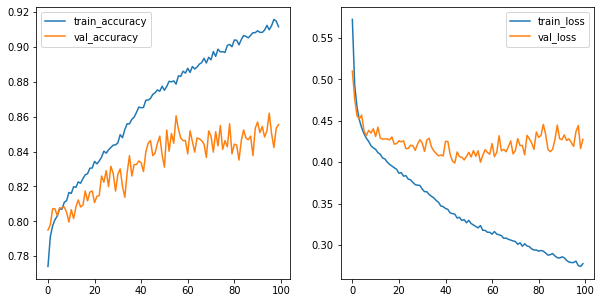

In [198]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(history_train_LC2R.history['accuracy'])
ax[0].plot(history_train_LC2R.history['val_accuracy'])
ax[0].legend(['train_accuracy', 'val_accuracy'])
ax[1].plot(history_train_LC2R.history['loss'])
ax[1].plot(history_train_LC2R.history['val_loss'])
ax[1].legend(['train_loss', 'val_loss'])
plt.show()

In [201]:
modelLC2R.evaluate(X_test_np, y_test_np)

69/69 [==============================] - 0s 2ms/step - loss: 0.4397 - accuracy: 0.8538


[0.43966197967529297, 0.8538145422935486]

In [33]:
# Four-layer neural network
modelLC3 = tf.keras.Sequential([
  layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
  layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
  layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
  layers.Dense(1, activation = 'sigmoid')
])

modelLC3.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_train_LC3 = modelLC3.fit(X_train_np,
                          y_train_np,
                          validation_data = (X_val_np, y_val_np),
                          epochs=100)

Epoch 1/100
555/555 [==============================] - 3s 2ms/step - loss: 0.6179 - accuracy: 0.7802 - val_loss: 0.5400 - val_accuracy: 0.7955
Epoch 2/100
555/555 [==============================] - 1s 2ms/step - loss: 0.5018 - accuracy: 0.7952 - val_loss: 0.4908 - val_accuracy: 0.7960
Epoch 3/100
555/555 [==============================] - 1s 2ms/step - loss: 0.4684 - accuracy: 0.8016 - val_loss: 0.4728 - val_accuracy: 0.8042
Epoch 4/100
555/555 [==============================] - 1s 2ms/step - loss: 0.4510 - accuracy: 0.8056 - val_loss: 0.4637 - val_accuracy: 0.8062
Epoch 5/100
555/555 [==============================] - 1s 2ms/step - loss: 0.4410 - accuracy: 0.8058 - val_loss: 0.4518 - val_accuracy: 0.8092
Epoch 6/100
555/555 [==============================] - 1s 2ms/step - loss: 0.4327 - accuracy: 0.8093 - val_loss: 0.4494 - val_accuracy: 0.8062
Epoch 7/100
555/555 [==============================] - 1s 2ms/step - loss: 0.4263 - accuracy: 0.8134 - val_loss: 0.4484 - val_accuracy: 0.8077

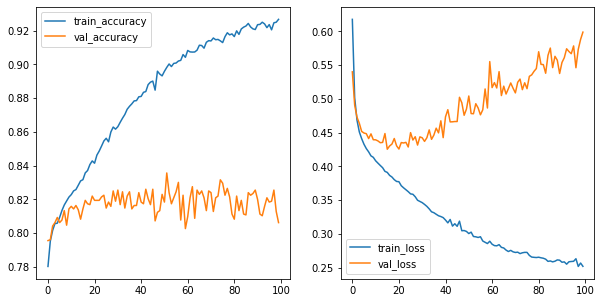

In [34]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(history_train_LC3.history['accuracy'])
ax[0].plot(history_train_LC3.history['val_accuracy'])
ax[0].legend(['train_accuracy', 'val_accuracy'])
ax[1].plot(history_train_LC3.history['loss'])
ax[1].plot(history_train_LC3.history['val_loss'])
ax[1].legend(['train_loss', 'val_loss'])
plt.show()

In [35]:
modelLC3.evaluate(X_test_np, y_test_np)

69/69 [==============================] - 0s 1ms/step - loss: 0.5653 - accuracy: 0.8296


[0.5653014183044434, 0.8296025395393372]

The two-layer network was able to reduce the loss the best out of all the models tested. While the three-layer network got the highest accuracy, we care mainly about the lowest loss. The four-layer network demonstrated a willingness to overfit without much gain on loss or accuracy in its curve. Thus, we move forward with the two-layer network.

##### Epoch Length
In this section, I tried using epoch lengths of 20, 30, and 40.

In [39]:
# Four-layer neural network
modelEL20 = tf.keras.Sequential([
  layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
  layers.Dense(1, activation = 'sigmoid')
])

modelEL20.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_train_EL20 = modelEL20.fit(X_train_np,
                          y_train_np,
                          validation_data = (X_val_np, y_val_np),
                          epochs=20)

Epoch 1/20
555/555 [==============================] - 1s 2ms/step - loss: 0.5146 - accuracy: 0.7649 - val_loss: 0.4872 - val_accuracy: 0.7844
Epoch 2/20
555/555 [==============================] - 1s 1ms/step - loss: 0.4661 - accuracy: 0.7906 - val_loss: 0.4662 - val_accuracy: 0.7960
Epoch 3/20
555/555 [==============================] - 1s 1ms/step - loss: 0.4534 - accuracy: 0.7976 - val_loss: 0.4616 - val_accuracy: 0.7940
Epoch 4/20
555/555 [==============================] - 1s 1ms/step - loss: 0.4459 - accuracy: 0.7993 - val_loss: 0.4545 - val_accuracy: 0.8026
Epoch 5/20
555/555 [==============================] - 1s 1ms/step - loss: 0.4411 - accuracy: 0.8013 - val_loss: 0.4489 - val_accuracy: 0.7996
Epoch 6/20
555/555 [==============================] - 1s 1ms/step - loss: 0.4363 - accuracy: 0.8021 - val_loss: 0.4496 - val_accuracy: 0.7996
Epoch 7/20
555/555 [==============================] - 1s 1ms/step - loss: 0.4321 - accuracy: 0.8046 - val_loss: 0.4479 - val_accuracy: 0.8042
Epoch 

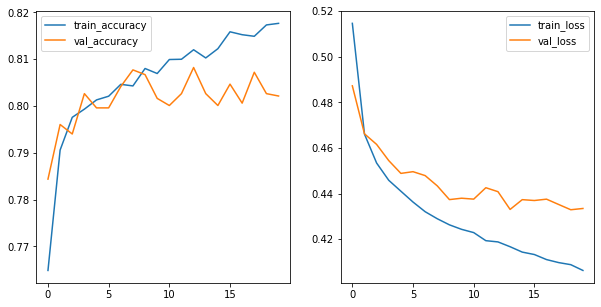

In [40]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(history_train_EL20.history['accuracy'])
ax[0].plot(history_train_EL20.history['val_accuracy'])
ax[0].legend(['train_accuracy', 'val_accuracy'])
ax[1].plot(history_train_EL20.history['loss'])
ax[1].plot(history_train_EL20.history['val_loss'])
ax[1].legend(['train_loss', 'val_loss'])
plt.show()

In [41]:
modelEL20.evaluate(X_test_np, y_test_np)

69/69 [==============================] - 0s 968us/step - loss: 0.4204 - accuracy: 0.8154


[0.4203730523586273, 0.815440833568573]

In [42]:
modelEL30 = tf.keras.Sequential([
  layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
  layers.Dense(1, activation = 'sigmoid')
])

modelEL30.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_train_EL30 = modelEL30.fit(X_train_np,
                          y_train_np,
                          validation_data = (X_val_np, y_val_np),
                          epochs=30)

Epoch 1/30
555/555 [==============================] - 1s 2ms/step - loss: 0.5077 - accuracy: 0.7716 - val_loss: 0.4832 - val_accuracy: 0.7884
Epoch 2/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4668 - accuracy: 0.7902 - val_loss: 0.4711 - val_accuracy: 0.7915
Epoch 3/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4546 - accuracy: 0.7959 - val_loss: 0.4562 - val_accuracy: 0.7920
Epoch 4/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4469 - accuracy: 0.7977 - val_loss: 0.4536 - val_accuracy: 0.7986
Epoch 5/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4416 - accuracy: 0.8011 - val_loss: 0.4483 - val_accuracy: 0.8001
Epoch 6/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4374 - accuracy: 0.8034 - val_loss: 0.4437 - val_accuracy: 0.8026
Epoch 7/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4328 - accuracy: 0.8036 - val_loss: 0.4425 - val_accuracy: 0.8021
Epoch 

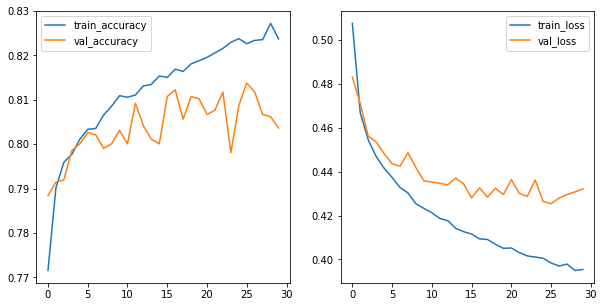

In [43]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(history_train_EL30.history['accuracy'])
ax[0].plot(history_train_EL30.history['val_accuracy'])
ax[0].legend(['train_accuracy', 'val_accuracy'])
ax[1].plot(history_train_EL30.history['loss'])
ax[1].plot(history_train_EL30.history['val_loss'])
ax[1].legend(['train_loss', 'val_loss'])
plt.show()

In [44]:
modelEL30.evaluate(X_test_np, y_test_np)

69/69 [==============================] - 0s 971us/step - loss: 0.4272 - accuracy: 0.8054


[0.4272160232067108, 0.8053905963897705]

In [45]:
modelEL40 = tf.keras.Sequential([
  layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
  layers.Dense(1, activation = 'sigmoid')
])

modelEL40.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_train_EL40 = modelEL40.fit(X_train_np,
                          y_train_np,
                          validation_data = (X_val_np, y_val_np),
                          epochs=40)

Epoch 1/40
555/555 [==============================] - 1s 2ms/step - loss: 0.5114 - accuracy: 0.7677 - val_loss: 0.4818 - val_accuracy: 0.7879
Epoch 2/40
555/555 [==============================] - 1s 1ms/step - loss: 0.4640 - accuracy: 0.7908 - val_loss: 0.4653 - val_accuracy: 0.7976
Epoch 3/40
555/555 [==============================] - 1s 1ms/step - loss: 0.4518 - accuracy: 0.7957 - val_loss: 0.4599 - val_accuracy: 0.8001
Epoch 4/40
555/555 [==============================] - 1s 1ms/step - loss: 0.4450 - accuracy: 0.7999 - val_loss: 0.4540 - val_accuracy: 0.7981
Epoch 5/40
555/555 [==============================] - 1s 1ms/step - loss: 0.4388 - accuracy: 0.8030 - val_loss: 0.4490 - val_accuracy: 0.8037
Epoch 6/40
555/555 [==============================] - 1s 1ms/step - loss: 0.4342 - accuracy: 0.8028 - val_loss: 0.4446 - val_accuracy: 0.8026
Epoch 7/40
555/555 [==============================] - 1s 1ms/step - loss: 0.4315 - accuracy: 0.8058 - val_loss: 0.4489 - val_accuracy: 0.8001
Epoch 

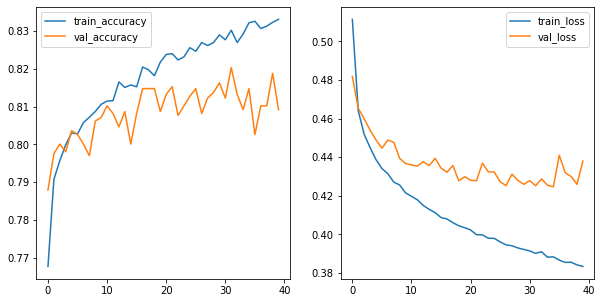

In [46]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(history_train_EL40.history['accuracy'])
ax[0].plot(history_train_EL40.history['val_accuracy'])
ax[0].legend(['train_accuracy', 'val_accuracy'])
ax[1].plot(history_train_EL40.history['loss'])
ax[1].plot(history_train_EL40.history['val_loss'])
ax[1].legend(['train_loss', 'val_loss'])
plt.show()

In [47]:
modelEL40.evaluate(X_test_np, y_test_np)

69/69 [==============================] - 0s 1ms/step - loss: 0.4293 - accuracy: 0.8095


[0.4292663335800171, 0.8095020651817322]

Out of these, an epoch length of 30 seems to be the best choice. Not only does it take less time than 40, it trains for long enough to have less loss than both 20 and 40 while still running comparably with the 100 epoch run.

##### Neuron Count


In [48]:
modelNC96 = tf.keras.Sequential([
  layers.Dense(96, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
  layers.Dense(1, activation = 'sigmoid')
])

modelNC96.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_train_NC96 = modelNC96.fit(X_train_np,
                          y_train_np,
                          validation_data = (X_val_np, y_val_np),
                          epochs=30)

Epoch 1/30
555/555 [==============================] - 1s 2ms/step - loss: 0.5060 - accuracy: 0.7721 - val_loss: 0.4821 - val_accuracy: 0.7834
Epoch 2/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4647 - accuracy: 0.7913 - val_loss: 0.4669 - val_accuracy: 0.7900
Epoch 3/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4542 - accuracy: 0.7962 - val_loss: 0.4569 - val_accuracy: 0.7930
Epoch 4/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4459 - accuracy: 0.7985 - val_loss: 0.4533 - val_accuracy: 0.7971
Epoch 5/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4419 - accuracy: 0.7989 - val_loss: 0.4518 - val_accuracy: 0.7955
Epoch 6/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4378 - accuracy: 0.8046 - val_loss: 0.4494 - val_accuracy: 0.8011
Epoch 7/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4333 - accuracy: 0.8054 - val_loss: 0.4469 - val_accuracy: 0.7981
Epoch 

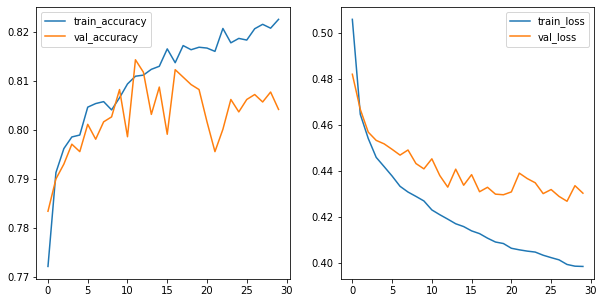

In [49]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(history_train_NC96.history['accuracy'])
ax[0].plot(history_train_NC96.history['val_accuracy'])
ax[0].legend(['train_accuracy', 'val_accuracy'])
ax[1].plot(history_train_NC96.history['loss'])
ax[1].plot(history_train_NC96.history['val_loss'])
ax[1].legend(['train_loss', 'val_loss'])
plt.show()

In [50]:
modelNC96.evaluate(X_test_np, y_test_np)

69/69 [==============================] - 0s 1ms/step - loss: 0.4266 - accuracy: 0.8045


[0.4265533983707428, 0.8044769167900085]

In [58]:
modelNC160 = tf.keras.Sequential([
  layers.Dense(160, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
  layers.Dense(1, activation = 'sigmoid')
])

modelNC160.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_train_NC160 = modelNC160.fit(X_train_np,
                          y_train_np,
                          validation_data = (X_val_np, y_val_np),
                          epochs=30)

Epoch 1/30
555/555 [==============================] - 2s 2ms/step - loss: 0.5028 - accuracy: 0.7703 - val_loss: 0.4758 - val_accuracy: 0.7900
Epoch 2/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4625 - accuracy: 0.7920 - val_loss: 0.4674 - val_accuracy: 0.7945
Epoch 3/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4511 - accuracy: 0.7958 - val_loss: 0.4586 - val_accuracy: 0.7965
Epoch 4/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4443 - accuracy: 0.7997 - val_loss: 0.4529 - val_accuracy: 0.7976
Epoch 5/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4395 - accuracy: 0.7995 - val_loss: 0.4478 - val_accuracy: 0.8042
Epoch 6/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4354 - accuracy: 0.8047 - val_loss: 0.4463 - val_accuracy: 0.8031
Epoch 7/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4315 - accuracy: 0.8025 - val_loss: 0.4437 - val_accuracy: 0.8042
Epoch 

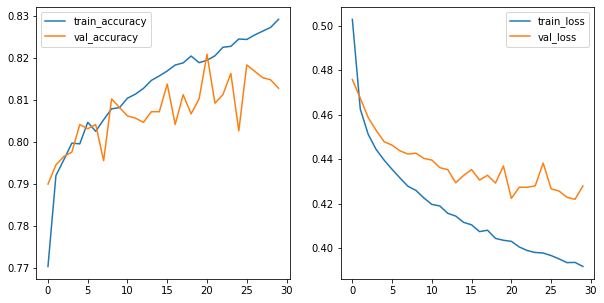

In [59]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(history_train_NC160.history['accuracy'])
ax[0].plot(history_train_NC160.history['val_accuracy'])
ax[0].legend(['train_accuracy', 'val_accuracy'])
ax[1].plot(history_train_NC160.history['loss'])
ax[1].plot(history_train_NC160.history['val_loss'])
ax[1].legend(['train_loss', 'val_loss'])
plt.show()

In [67]:
modelNC160.evaluate(X_test_np, y_test_np)

69/69 [==============================] - 0s 937us/step - loss: 0.4254 - accuracy: 0.8122


[0.4254131019115448, 0.8122430443763733]

Out of 96, 128, and 160 nodes per layer, the best model is the one with 160 nodes as it consistently reaches lower validation loss than the other models.

##### Optimizers

In [68]:
# RMSprop
modelRMSP = tf.keras.Sequential([
  layers.Dense(160, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
  layers.Dense(1, activation = 'sigmoid')
])

modelRMSP.compile(optimizer='RMSprop',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_train_RMSP = modelRMSP.fit(X_train_np,
                          y_train_np,
                          validation_data = (X_val_np, y_val_np),
                          epochs=30)

Epoch 1/30
555/555 [==============================] - 1s 2ms/step - loss: 0.5038 - accuracy: 0.7735 - val_loss: 0.4824 - val_accuracy: 0.7889
Epoch 2/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4640 - accuracy: 0.7915 - val_loss: 0.4786 - val_accuracy: 0.7935
Epoch 3/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4519 - accuracy: 0.7977 - val_loss: 0.4587 - val_accuracy: 0.7971
Epoch 4/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4436 - accuracy: 0.8002 - val_loss: 0.4529 - val_accuracy: 0.7945
Epoch 5/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4381 - accuracy: 0.8023 - val_loss: 0.4526 - val_accuracy: 0.8026
Epoch 6/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4340 - accuracy: 0.8027 - val_loss: 0.4470 - val_accuracy: 0.8057
Epoch 7/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4305 - accuracy: 0.8063 - val_loss: 0.4415 - val_accuracy: 0.8052
Epoch 

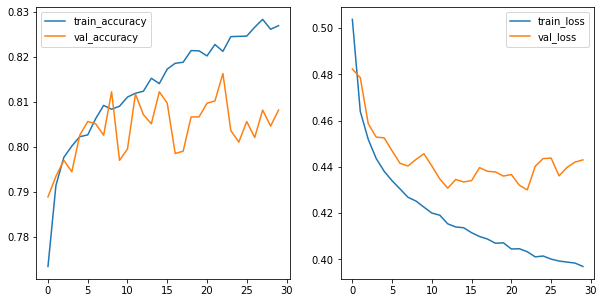

In [69]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(history_train_RMSP.history['accuracy'])
ax[0].plot(history_train_RMSP.history['val_accuracy'])
ax[0].legend(['train_accuracy', 'val_accuracy'])
ax[1].plot(history_train_RMSP.history['loss'])
ax[1].plot(history_train_RMSP.history['val_loss'])
ax[1].legend(['train_loss', 'val_loss'])
plt.show()

In [74]:
modelRMSP.evaluate(X_test_np, y_test_np)

69/69 [==============================] - 0s 1ms/step - loss: 0.4356 - accuracy: 0.8004


[0.43564653396606445, 0.8003654479980469]

In [71]:
# Nadam

modelNad = tf.keras.Sequential([
  layers.Dense(160, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
  layers.Dense(1, activation = 'sigmoid')
])

modelNad.compile(optimizer='Nadam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_train_Nad = modelNad.fit(X_train_np,
                          y_train_np,
                          validation_data = (X_val_np, y_val_np),
                          epochs=30)

Epoch 1/30
555/555 [==============================] - 1s 2ms/step - loss: 0.5042 - accuracy: 0.7689 - val_loss: 0.4792 - val_accuracy: 0.7920
Epoch 2/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4635 - accuracy: 0.7913 - val_loss: 0.4657 - val_accuracy: 0.7905
Epoch 3/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4514 - accuracy: 0.7953 - val_loss: 0.4610 - val_accuracy: 0.7981
Epoch 4/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4450 - accuracy: 0.8001 - val_loss: 0.4604 - val_accuracy: 0.7960
Epoch 5/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4396 - accuracy: 0.8024 - val_loss: 0.4535 - val_accuracy: 0.7960
Epoch 6/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4356 - accuracy: 0.8051 - val_loss: 0.4491 - val_accuracy: 0.7971
Epoch 7/30
555/555 [==============================] - 1s 2ms/step - loss: 0.4316 - accuracy: 0.8032 - val_loss: 0.4426 - val_accuracy: 0.8026
Epoch 

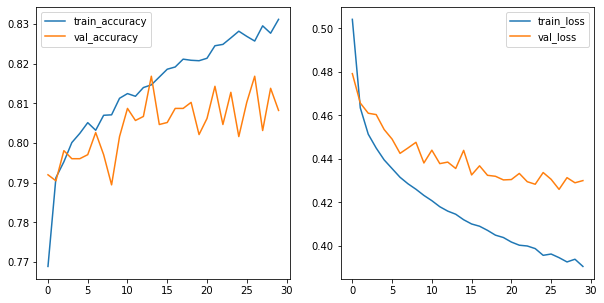

In [72]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(history_train_Nad.history['accuracy'])
ax[0].plot(history_train_Nad.history['val_accuracy'])
ax[0].legend(['train_accuracy', 'val_accuracy'])
ax[1].plot(history_train_Nad.history['loss'])
ax[1].plot(history_train_Nad.history['val_loss'])
ax[1].legend(['train_loss', 'val_loss'])
plt.show()

In [73]:
modelNad.evaluate(X_test_np, y_test_np)

69/69 [==============================] - 0s 1ms/step - loss: 0.4262 - accuracy: 0.8086


[0.4261569678783417, 0.8085883855819702]

Adam appears to perform the best out of these. RMSprop and Nadam do not come as close to the low validation values the model attains over the epochs with Adam.

##### Regularization



In [75]:
# lambda = 0.002

modelR2 = tf.keras.Sequential([
  layers.Dense(160, activation='relu', kernel_regularizer=keras.regularizers.l2(0.002)),
  layers.Dense(1, activation = 'sigmoid')
])

modelR2.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_train_R2 = modelR2.fit(X_train_np,
                          y_train_np,
                          validation_data = (X_val_np, y_val_np),
                          epochs=30)

Epoch 1/30
555/555 [==============================] - 1s 2ms/step - loss: 0.5268 - accuracy: 0.7710 - val_loss: 0.4981 - val_accuracy: 0.7839
Epoch 2/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4730 - accuracy: 0.7904 - val_loss: 0.4699 - val_accuracy: 0.7813
Epoch 3/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4572 - accuracy: 0.7933 - val_loss: 0.4636 - val_accuracy: 0.7920
Epoch 4/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4499 - accuracy: 0.7944 - val_loss: 0.4558 - val_accuracy: 0.7986
Epoch 5/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4442 - accuracy: 0.7983 - val_loss: 0.4525 - val_accuracy: 0.8021
Epoch 6/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4392 - accuracy: 0.8017 - val_loss: 0.4489 - val_accuracy: 0.7930
Epoch 7/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4360 - accuracy: 0.8028 - val_loss: 0.4453 - val_accuracy: 0.8057
Epoch 

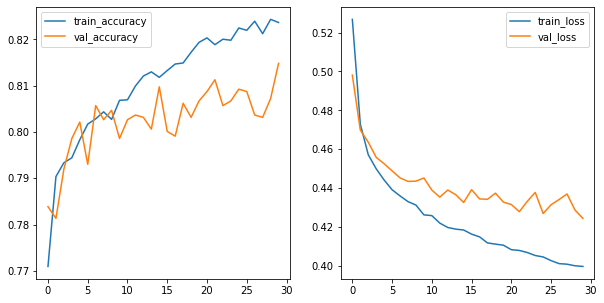

In [76]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(history_train_R2.history['accuracy'])
ax[0].plot(history_train_R2.history['val_accuracy'])
ax[0].legend(['train_accuracy', 'val_accuracy'])
ax[1].plot(history_train_R2.history['loss'])
ax[1].plot(history_train_R2.history['val_loss'])
ax[1].legend(['train_loss', 'val_loss'])
plt.show()

In [77]:
modelR2.evaluate(X_test_np, y_test_np)

69/69 [==============================] - 0s 1ms/step - loss: 0.4164 - accuracy: 0.8118


[0.4163978099822998, 0.8117861747741699]

In [81]:
# lambda = 0.0005

modelR3 = tf.keras.Sequential([
  layers.Dense(160, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0005)),
  layers.Dense(1, activation = 'sigmoid')
])

modelR3.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_train_R3 = modelR3.fit(X_train_np,
                          y_train_np,
                          validation_data = (X_val_np, y_val_np),
                          epochs=30)

Epoch 1/30
555/555 [==============================] - 1s 2ms/step - loss: 0.4870 - accuracy: 0.7756 - val_loss: 0.4662 - val_accuracy: 0.7879
Epoch 2/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4536 - accuracy: 0.7952 - val_loss: 0.4541 - val_accuracy: 0.7981
Epoch 3/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4445 - accuracy: 0.7994 - val_loss: 0.4489 - val_accuracy: 0.8062
Epoch 4/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4365 - accuracy: 0.8013 - val_loss: 0.4450 - val_accuracy: 0.8011
Epoch 5/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4315 - accuracy: 0.8038 - val_loss: 0.4465 - val_accuracy: 0.7950
Epoch 6/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4278 - accuracy: 0.8069 - val_loss: 0.4406 - val_accuracy: 0.8011
Epoch 7/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4248 - accuracy: 0.8082 - val_loss: 0.4350 - val_accuracy: 0.8092
Epoch 

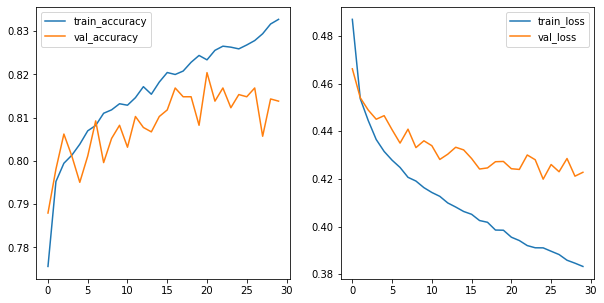

In [82]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(history_train_R3.history['accuracy'])
ax[0].plot(history_train_R3.history['val_accuracy'])
ax[0].legend(['train_accuracy', 'val_accuracy'])
ax[1].plot(history_train_R3.history['loss'])
ax[1].plot(history_train_R3.history['val_loss'])
ax[1].legend(['train_loss', 'val_loss'])
plt.show()

In [83]:
modelR3.evaluate(X_test_np, y_test_np)

69/69 [==============================] - 0s 924us/step - loss: 0.4258 - accuracy: 0.8090


[0.42575427889823914, 0.8090452551841736]

Out of these three, it seems setting lambda to 0.0005 was the best choice as it was enough regularization to keep the network from overfitting while not slowing it down or letting it overfit. 0.001 seemed to be too much while moving further in that direction with 0.002 stifled it further.

#### Final Version

The version I thought came out best involved a few drastic changes, namely bumping the layer count to four, boosting the node count to 160 per layer, using L2 regularization, and decreasing the epoch count to 30. Everyting else remains the same.

In [87]:
modelFinal = tf.keras.Sequential([
  layers.Dense(160, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0005)),
  layers.Dense(1, activation = 'sigmoid')
])

modelFinal.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_train_Final = modelFinal.fit(X_train_np,
                          y_train_np,
                          validation_data = (X_val_np, y_val_np),
                          epochs=30)

Epoch 1/30
555/555 [==============================] - 1s 2ms/step - loss: 0.4920 - accuracy: 0.7683 - val_loss: 0.4693 - val_accuracy: 0.7854
Epoch 2/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4542 - accuracy: 0.7914 - val_loss: 0.4556 - val_accuracy: 0.7960
Epoch 3/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4444 - accuracy: 0.7963 - val_loss: 0.4531 - val_accuracy: 0.7971
Epoch 4/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4364 - accuracy: 0.8018 - val_loss: 0.4484 - val_accuracy: 0.7935
Epoch 5/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4321 - accuracy: 0.8025 - val_loss: 0.4535 - val_accuracy: 0.7965
Epoch 6/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4286 - accuracy: 0.8049 - val_loss: 0.4394 - val_accuracy: 0.7996
Epoch 7/30
555/555 [==============================] - 1s 1ms/step - loss: 0.4244 - accuracy: 0.8072 - val_loss: 0.4405 - val_accuracy: 0.8031
Epoch 

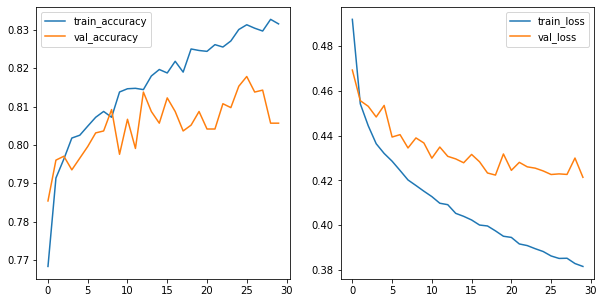

In [88]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(history_train_Final.history['accuracy'])
ax[0].plot(history_train_Final.history['val_accuracy'])
ax[0].legend(['train_accuracy', 'val_accuracy'])
ax[1].plot(history_train_Final.history['loss'])
ax[1].plot(history_train_Final.history['val_loss'])
ax[1].legend(['train_loss', 'val_loss'])
plt.show()

In [90]:
modelFinal.evaluate(X_test_np, y_test_np)

69/69 [==============================] - 0s 1ms/step - loss: 0.4228 - accuracy: 0.8058


[0.42279380559921265, 0.8058474063873291]

#### Hyperparameter Selection

The way I selected hyperparameters was to keep the loss curve low in the validation set. Validation loss is what we need to make modeling and tuning decisions on - if we base such decisions on the results the test set gets, we violate the fundamental principle of machine learning. This introduces bias, which means our test results become biased estimates of performance as [source](https://github.com/Uzmamushtaque/CSCI4962-Projects-ML-AI/blob/main/Lecture_5.ipynb) states.

The process was mainly trial and error. I used this as I wanted to gain experience on tuning the parameters myself so I understand each one's repercussions. More specifically, I usually nudged the hyperparameters in two different directions when testing and tuning. One would become larger, the other would become smaller. Based on the results of this, I would find which returned better validation loss values in general.

I used a moderate amount of regularization, setting lambda to 0.0005, because while it did not overfit much, the two-layer neural network still has the potential to overfit. This was especially visible when running with the original 100 epochs.

I also used an optimization algorithm as well, that being Adam, because I wanted to ensure the training set fit the cost function.

### Baseline: Logistic Regression

#### Partitioning the Data

In [ ]:
# divide data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42)

In [ ]:
X_train

bmi        Age  asa_status  baseline_cancer  baseline_charlson  \
5333   26.920000  70.500000           0                0                  0   
15535  27.186844  52.084568           0                0                  0   
6612   28.980000  90.000000           1                0                  0   
19989  46.952386  64.213595           1                0                  3   
180    23.690000  58.100000           0                1                  2   
...          ...        ...         ...              ...                ...   
11964  28.110000  69.400000           1                1                  3   
21575  46.925838  29.584112           0                0                  0   
5390   25.180000  70.400000           0                0                  0   
860    27.460000  56.600000           0                1                  2   
15795  21.802848  36.324410           0                0                  0   

       baseline_cvd  baseline_dementia  baseline_diabetes  baseline_digestive  \
5333              1                  0                  0                   0   
15535             0                  0                  0                   0   
6612              1                  0                  0                   0   
19989             1                  0                  0                   0   
180               1                  0                  0                   0   
...             ...                ...                ...                 ...   
11964             1                  0                  0                   1   
21575             0                  0                  0                   0   
5390              0                  0                  0                   0   
860               1                  0                  0                   0   
15795             0                  0                  0                   0   

       baseline_osteoart  ...  ccsMort30Rate  complication_rsi  dow  gender  \
5333                   1  ...       0.002959         -2.290000    3       0   
15535                  0  ...       0.006336         -0.985806    0       0   
6612                   1  ...       0.002959         -1.970000    0       1   
19989                  0  ...       0.000890          0.312961    1       0   
180                    0  ...       0.002262         -0.260000    4       0   
...                  ...  ...            ...               ...  ...     ...   
11964                  0  ...       0.002764         -1.170000    1       1   
21575                  0  ...       0.013329         -1.175290    1       0   
5390                   1  ...       0.007398          0.000000    2       1   
860                    0  ...       0.000373         -0.060000    1       1   
15795                  0  ...       0.001962          0.000000    2       0   

            hour  month  moonphase  mort30  mortality_rsi  race  
5333    7.550000      2          2       0      -2.610000     1  
15535  11.298126      8          1       0      -0.806957     0  
6612    9.120000      8          0       0      -2.250000     1  
19989  11.656980      7          0       0       0.365565     1  
180    12.570000     10          1       0      -2.620000     1  
...          ...    ...        ...     ...            ...   ...  
11964   7.500000      9          2       0      -0.120000     1  
21575  10.611529      1          1       0      -0.630538     0  
5390   14.770000      4          0       0      -1.330000     1  
860    14.250000      4          3       0      -0.820000     1  
15795   9.399740     10          3       0       0.316574     1  

[19701 rows x 24 columns]

In [ ]:
X_test.shape

(2189, 24)

In [ ]:
y_train.shape

(19701,)

In [ ]:
y_test.shape

(2189,)

In [ ]:
y_train

5333     0
15535    1
6612     0
19989    1
180      0
        ..
11964    1
21575    1
5390     0
860      0
15795    1
Name: target, Length: 19701, dtype: int64

In [ ]:
features = X_train.columns.values.tolist()
features

['bmi',
 'Age',
 'asa_status',
 'baseline_cancer',
 'baseline_charlson',
 'baseline_cvd',
 'baseline_dementia',
 'baseline_diabetes',
 'baseline_digestive',
 'baseline_osteoart',
 'baseline_psych',
 'baseline_pulmonary',
 'ahrq_ccs',
 'ccsComplicationRate',
 'ccsMort30Rate',
 'complication_rsi',
 'dow',
 'gender',
 'hour',
 'month',
 'moonphase',
 'mort30',
 'mortality_rsi',
 'race']

#### Feature Scaling

In this step we scale features to appropriate values for this model to use. I initially used a Normalizer to scale the data between 0 and 1. When it did this, it normalized all of the values together. This meant features with larger values, such as miss_distance, dominated the normalization and unfairly skewed the data for features with smaller values, such as est_diameter_min and est_diameter_max.

This was resolved by using a [StandardScalar](https://stackoverflow.com/questions/40758562/can-anyone-explain-me-standardscaler). It normalizes each feature individually such that each feature has μ = 0 (removed mean) and σ = 1 (unit variance). Doing this removes concerns of values in one feature influencing how other features' values are normalized.

In [92]:
# old approach
# scale the data between 0 and 1
# transformer = Normalizer(norm='max').fit(X_train)
# X_train = transformer.transform(X_train)
# X_test = transformer.transform(X_test)

# StandardScalar is not being used in this project, please see the section
# "Unscaled Data"

# current approach
# normalize the data so each feature has μ = 0 and σ = 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [93]:
X_train

array([[-1.30211485, -0.46211811, -1.03100795, ..., -0.05100217,
        -0.22773904,  0.30888415],
       [-0.89444358,  0.65035519, -1.03100795, ..., -0.05100217,
         0.16768573,  0.30888415],
       [ 1.49713214,  0.04417386,  0.82877137, ..., -0.05100217,
        -0.77152478,  2.92672162],
       ...,
       [-0.41541033,  0.54043793, -1.03100795, ..., -0.05100217,
         0.20042915,  0.30888415],
       [ 0.89539735, -0.07239947,  0.82877137, ..., -0.05100217,
         0.38968095,  0.30888415],
       [-1.39527501, -1.20550622, -1.03100795, ..., -0.05100217,
         1.86151148,  0.30888415]])

In [94]:
X_test

array([[ 0.92605044,  0.65505036,  0.86152686, ..., -0.06056436,
         0.66086866,  0.30835037],
       [-0.20840653,  1.62626186,  0.86152686, ..., -0.06056436,
        -1.39557717,  0.30835037],
       [ 1.60644946,  0.75475545,  0.86152686, ..., -0.06056436,
        -1.09372385,  0.30835037],
       ...,
       [ 1.7461542 , -0.15715191,  0.86152686, ..., -0.06056436,
        -1.96478628,  0.30835037],
       [ 1.7461542 ,  0.06793915,  0.86152686, ..., -0.06056436,
        -0.68837797,  0.30835037],
       [-0.92362676, -1.14602493, -0.97477527, ..., -0.06056436,
         1.10594992, -2.42435795]])

In [95]:
# convert to numpy-friendly format
y_train = y_train.to_numpy().astype(int)

In [96]:
# convert to numpy-friendly format
y_test = y_test.to_numpy().astype(int)

In [97]:
# define the model
lrg = LogisticRegression(class_weight='balanced', random_state=0)

In [98]:
# train the model
lrg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=0)

In [99]:
# predict the result using the trained model
y_pred_lrg = lrg.predict(X_test)

In [100]:
# precision of the model
precision_score(y_test, y_pred_lrg)

0.767379679144385

In [101]:
# recall of the model
recall_score(y_test, y_pred_lrg)

0.8031716417910447

In [102]:
# overall acuracy of the model
accuracy_score(y_test, y_pred_lrg)

0.784376427592508

In [103]:
# f1 score of the model
f1_score(y_test, y_pred_lrg)

0.7848678213309024

In [104]:
# log loss of the model
y_pred_lrg_proba = lrg.predict_proba(X_test)
log_loss(y_test, y_pred_lrg_proba)

0.47956953416405596

### Model Comparison

We track the loss within the neural network. Additionally, we can track the loss within logistic regression by taking the log loss after getting the predicted probabilities for y from the model.

The neural network's loss, at its lowest, is 0.42279 while the logistic regression's loss is 0.47957. In terms of accuracy, the neural network reached 0.80585 while the logistic regression reached 0.78438. The neural network's advantage mainly rests in its greater accuracy. However, it loses out to the logistic regression model when considering time investment and simplicity. Tuning the neural network is an exhaustive process by hand. Tuning it through a process like Bayesian Optimization is certainly more accurate, but a greater commitment of time and resources is needed.

The neural network tends to be an overfitting behemoth. This makes it great for tasks with large quantities of data. In this case, there seemed to be enough data for it to perform significantly better than the logistic regression when using the wider model like the one I made final.

The neural network performs better in terms of correctness than the logistic regression because the dataset uses over 20000 observations after using SMOTE while also containing 25 features each including the target (whether or not the patient had a complication after surgery). If we desire better performance on loss and other metrics, this is the model we wish to use. This dataset is large enough for it to be a valid choice here. Its complexity is large enough for the logistic regression model to start faltering with accuracy under 0.8 and loss nearing 0.5. However, the dataset is small enough for this model to prove viable in the sense it works out of the box (no need for tuning), needing less time to run, and being a more simple, more explainable model. The neural network needs to be reeled in to run on a dataset like this with techniques like regularization and an optimization algorithm. However, if absolute metric performance is critical, like ensuring we know exactly who will and who will not experience complications after surgery, the neural network would be the model to use. I would argue the neural network is the model to use here because it can be further tweaked to properly fit this data. The fact I could make it run better when hand-tuning it proves there is more potential in the model that can be coaxed out with regularization and Bayesian optimization of the parameters.